In [ ]:
!conda install --yes cvxopt

In [1]:
import numpy as np
import pandas as pd
import  matplotlib.pyplot as plt
import cvxopt

In [2]:
data=pd.read_csv('/Users/yangxiaomin/Documents/courses/csci 5525/5525HW_2/hw2data.csv')
data.head()

,1.764052345967664,0.4001572083672233,-1.0
0,0.978738,2.240893,-1.0
1,1.867558,-0.977278,1.0
2,0.950088,-0.151357,1.0
3,-0.103219,0.410599,1.0
4,0.144044,1.454274,-1.0


In [3]:
# split data into train test
n_t=data.shape[0]
n_train=round(0.8*n_t)
n_test=n_t-n_train
x_train=data.iloc[:n_train,:2]
x_test=data.iloc[n_train:,:2]
y_train=data.iloc[:n_train,[2]]
y_test=data.iloc[n_train:,[2]]

In [4]:

def gaussian_kernel(x, y, sigma=5.0):
    return np.exp(-np.linalg.norm(x-y)**2 / (2 * (sigma ** 2)))

In [5]:
 # Gram matrix
def gram_matrix(x_train):
    n_samples=x_train.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i,j] = gaussian_kernel(x_train.iloc[i,:], x_train.iloc[j,:])
            
    return K


In [6]:
def rbf_svm_train(x_train,y_train,c):
    y_train=pd.DataFrame.as_matrix(y_train)
    n_train=x_train.shape[0]
    # get gram_matrix
    G=gram_matrix(x_train)
    #compute H matrix
    H=np.outer(y_train,y_train)*1.*G
    # construct cvsmatrix
    q=-np.ones((n_train,1))
    G=np.vstack((-np.eye(n_train),np.eye(n_train)))
    p=H
    h=np.hstack((np.zeros(n_train),np.ones(n_train)*c))
    b=np.zeros(1)
    q=cvxopt.matrix(q)
    G=cvxopt.matrix(G)
    p=cvxopt.matrix(p)
    h=cvxopt.matrix(h)
    A=cvxopt.matrix(y_train.T)
    b=cvxopt.matrix(b)
    
    # solve problem
    sol = cvxopt.solvers.qp(p, q, G, h, A, b)
    # langurange multipliers
    a=np.ravel(sol['x'])
    # pick support point
    ind=a>0
    a=a[ind]
    x_train=x_train[ind]
    y_train=y_train[ind]
    # compute w
    n_t=a.shape[0]
    a=a.reshape((n_t,1))
    w=np.multiply(y_train,a)*x_train
    w=np.sum(w,axis=0)
    
    return w
    

In [7]:
# predict 
def rbf_svm_predict(x_test,w):
    n_test=x_test.shape[0]
    z=np.dot(x_test,w.T)
    pred=np.sign(z)
    pred=pred.reshape(n_test,1)
    return pred

In [8]:
#caculate accuracy by unmatched
def accuracy(y_test,y_pred):
    n_test=y_test.shape[0]
    correct=np.sum(y_test==y_pred)
    return correct/n_test





In [9]:
# shuffled the dataset
def cross_validation(x_train,y_train):
    
    n=x_train.shape[0]
    index = np.random.permutation(n)
    x_shuffled=x_train.iloc[index,:]
    y_shuffled=y_train.iloc[index,:]
    return x_shuffled,y_shuffled
    

In [10]:
def get_next_train_valid(X_shuffled, Y_shuffled, itr):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    size=len(Y_shuffled)/10
 
    validL=round(size*(itr-1))
    validR=round(size*(itr))
    X_valid=X_shuffled.iloc[validL:validR]
    y_valid=Y_shuffled.iloc[validL:validR]
    X_train=pd.concat([X_shuffled.iloc[0:validL],X_shuffled.iloc[validR:]])  
    y_train=pd.concat([Y_shuffled.iloc[0:validL],Y_shuffled.iloc[validR:]]) 
    return X_train,y_train,X_valid, y_valid
    #return training and validation data

In [11]:
def main(x_train,y_train,x_test,y_test,c):
    x_shuffled,y_shuffled=cross_validation(x_train,y_train)
    accu_cv=list()
    accu_t=list()
    accu_tra=list()
    for itr in range(1,11):
        x_train, y_train, x_valid, y_valid=get_next_train_valid(x_shuffled, y_shuffled, itr)
        #ntrain data using train set
        w=rbf_svm_train(x_train,y_train,c)
        #predict in v set
        pred=rbf_svm_predict(x_valid,w)
        # predict in test set
        tpred=rbf_svm_predict(x_test,w)
        print('predict in train set')
        trapred=rbf_svm_predict(x_train,w)
        print('caculate accuray')
        a=accuracy(pred,y_valid)
        at=accuracy(tpred,y_test)
        atra=accuracy(trapred,y_train)
        accu_cv.append(a)
        accu_t.append(at)
        accu_tra.append(atra)
    
    
    
    return accu_cv,accu_t,accu_tra
        

In [ ]:
validation_maccu,test_maccu,train_maccu=main(x_train,y_train,x_test,y_test,2)
print('validation mean accuracy: ' + str(validation_maccu))
print('test mean accuracy: ' + str(test_maccu))
print('train mean accuracy:' + str(train_maccu))


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [14]:
test_maccu

NameError: name 'test_maccu' is not defined

In [13]:
print('validation mean accuracy: ' + str(validation_maccu))
print('test mean accuracy: ' + str(test_maccu))
print('train mean accuracy:' + str(train_maccu))
print('test accuracy: '+ str(test_accu))

NameError: name 'validation_maccu' is not defined

[0.5138636495251332,
 0.5172672959617018,
 0.5162951219983013,
 0.5165024901552003,
 0.5165035035904564,
 0.5149745676009575,
 0.5145577561578256]

In [93]:
def plot(mean,title):
    hper=list((0.0001,0.001,0.01,0.1,10,100,1000))
    fig,ax=plt.subplots()

    ax.scatter(hper,mean, color='lightblue')
    lines = ax.plot(hper,mean) 
    ax.set(title=title,xlabel='C', ylabel='mean accuracy',ylim=[0.48,0.52])
    plt.show()

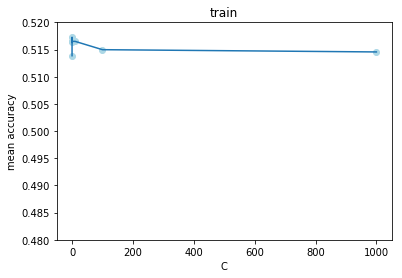

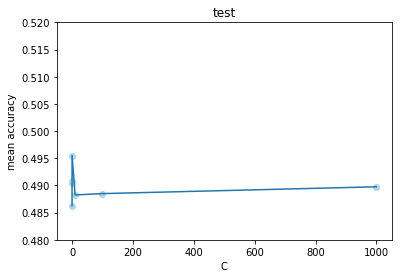

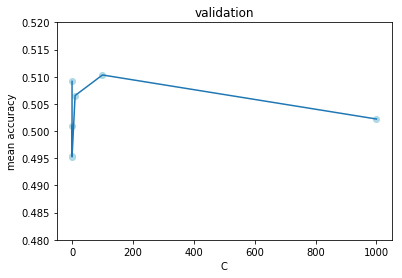

In [94]:
plot(mean_train,'train')
plot(mean_test,'test')
plot(mean_valid,'validation')

In [ ]:
'''
validation mean accuracy: 0.4790487421383648
test mean accuracy: 0.5089999999999999
train mean accuracy:0.48641514168790045
the result of kenerl it's slightly better than linear SVM, cause it's expand the feature thus capture more information
of features. So it's predict more accurate.
'''